<a href="https://colab.research.google.com/github/Luisinho-31/iris_regresion/blob/main/CLASIFICADOR_DE_IRIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresion logistica


En este colab se verá la clasificacion dependiendo de ciertos factores, con el objetivo de predecir la especie o tipo de una flor


*   Información obtenida desde https://www.kaggle.com/datasets/uciml/iris




##Carga de liberias

In [10]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import json

## Acceso a Kaggle

In [14]:
# @title
kaggle_ruta={"username":"luis1fernando2","key":"482787f29968a774bda7c9f64fe48a74"}

In [11]:
os.makedirs(os.path.expanduser("~/.kaggle"), exist_ok=True)
with open(os.path.expanduser("~/.kaggle/kaggle.json"), "w") as f:
    json.dump(kaggle_ruta, f)
os.chmod(os.path.expanduser("~/.kaggle/kaggle.json"), 0o600)


### Carga el dataset desde Kaggle

In [12]:
!kaggle datasets download -d uciml/iris

!unzip -o iris.zip

Dataset URL: https://www.kaggle.com/datasets/uciml/iris
License(s): CC0-1.0
  0% 0.00/3.60k [00:00<?, ?B/s]
100% 3.60k/3.60k [00:00<00:00, 12.3MB/s]
Archive:  iris.zip
  inflating: Iris.csv                
  inflating: database.sqlite         


##Carga del Dataset

In [13]:
df_iris = pd.read_csv("Iris.csv")

In [ ]:
df_iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


### Funcion para ver nulls and zeros

In [ ]:
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
        return mz_table

In [ ]:
missing_zero_values_table(df_iris)
#no tenemos valores ceros ni nulos

Your selected dataframe has 6 columns and 150 Rows.
There are 0 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type


In [ ]:
df_iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
df_iris.info()
#tenemso 150 datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


## Modelo


In [ ]:
# importamos libreria sklearn

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, roc_auc_score, mean_absolute_error, r2_score, classification_report,confusion_matrix
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay



In [ ]:
# Variables a predecir
target= 'Species'
# Variables continuas
continua = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']


In [ ]:
X = df_iris[continua]
y = df_iris[target]

In [ ]:
#convertimos pañabras en este caso especias a numeros
le = LabelEncoder()
y_convertida = le.fit_transform(y)
y_convertida

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
# asignamos el 25% de entrenamiento y 35 datos de prueba aleatorios
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.25, random_state=35)


In [ ]:
# Clase multinomial diversidad de categorias
modelo = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
modelo

LogisticRegression(max_iter=200, multi_class='multinomial')

In [ ]:
# Entrenamos al modelo
modelo.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=200, multi_class='multinomial')

In [ ]:
y_pred = modelo.predict(X_test)
y_pred

array([1, 1, 2, 1, 0, 2, 2, 1, 1, 0, 1, 2, 0, 2, 0, 2, 1, 0, 0, 0, 1, 1,
       2, 1, 0, 0, 0, 2, 0, 2, 0, 2, 1, 0, 1, 2, 0, 2])

In [ ]:
#Revisamos las evaluaciones
print("Accuracy:",modelo.score(X_test, y_test) * 100)


Accuracy: 94.73684210526315


In [ ]:
#Revisamos las evaluaciones
modelo.predict_proba(X_test)


array([[2.62477697e-02, 9.15208017e-01, 5.85442132e-02],
       [2.00967081e-02, 8.67206178e-01, 1.12697114e-01],
       [2.59772089e-05, 4.88855552e-02, 9.51088468e-01],
       [1.13384448e-03, 6.17401155e-01, 3.81465000e-01],
       [9.83066186e-01, 1.69337398e-02, 7.42941463e-08],
       [9.50656741e-06, 2.26480082e-02, 9.77342485e-01],
       [4.20276970e-04, 3.02837136e-01, 6.96742587e-01],
       [8.53811558e-02, 8.98914027e-01, 1.57048175e-02],
       [7.64445335e-03, 7.82534268e-01, 2.09821278e-01],
       [9.72810407e-01, 2.71894797e-02, 1.13666011e-07],
       [1.34382713e-02, 7.31161875e-01, 2.55399854e-01],
       [8.79956578e-06, 1.36141142e-02, 9.86377086e-01],
       [9.77405436e-01, 2.25944403e-02, 1.23861616e-07],
       [1.24279209e-05, 2.52639307e-02, 9.74723641e-01],
       [9.38178276e-01, 6.18213178e-02, 4.06717556e-07],
       [4.62348790e-04, 2.07970657e-01, 7.91566994e-01],
       [3.22725601e-02, 9.52376576e-01, 1.53508641e-02],
       [9.79086279e-01, 2.09136

In [ ]:
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


0.9473684210526315
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.92      0.92      0.92        12
           2       0.92      0.92      0.92        12

    accuracy                           0.95        38
   macro avg       0.94      0.94      0.94        38
weighted avg       0.95      0.95      0.95        38



In [ ]:
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))


Matriz de confusión:
[[14  0  0]
 [ 0 11  1]
 [ 0  1 11]]


In [ ]:
df_iris.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

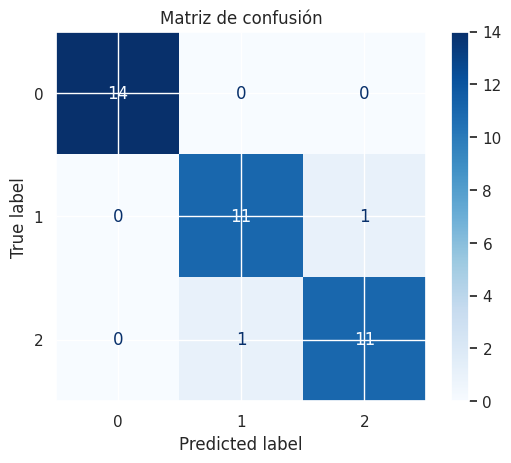

In [ ]:

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelo.classes_)
disp.plot(cmap='Blues')
plt.title('Matriz de confusión')
plt.show()

## Conclusiones:

como podemos observar en nuestra matriz de confusion vemos que nuestro pimer valor está bien clasificada que es la posicion (0,0) de nuestra matriz

al igual que en la poscision (2,2) observamos que tiene 11 valores bien clasificados y 1 mal clasificado
y se mantiene el mismo comportamiento en la posicion (1,1)



